<a href="https://colab.research.google.com/github/jesusrevilla/mineria-de-datos/blob/main/primer-parcial/06_Probabilidad_Condicional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Totales población = 180
a) Exacto   P(H|FE)  = 0.612245
a) Simulado P(H|FE)  = 0.612316
b) Exacto   P(NF|NH) = 0.516129
b) Simulado P(NF|NH) = 0.516045


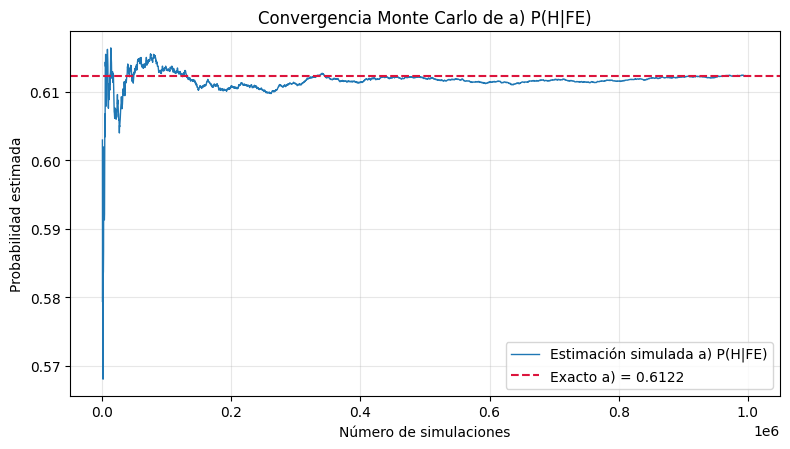

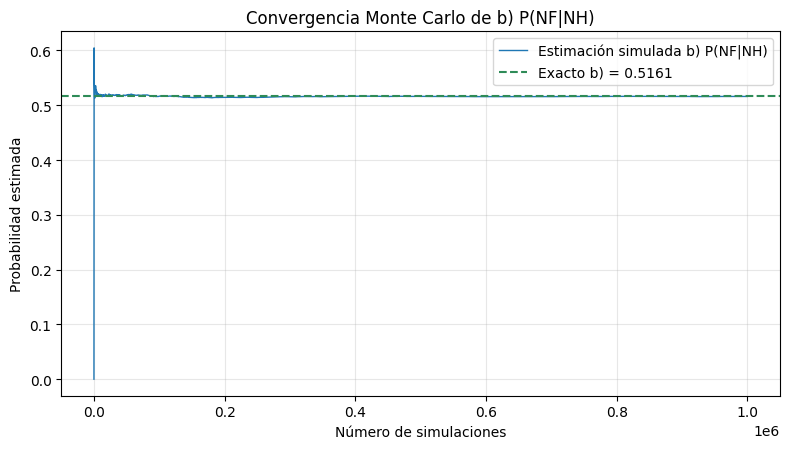

In [1]:
#@title Simulación Monte Carlo: hipertensión vs hábito de fumar
import numpy as np
import matplotlib.pyplot as plt

# Tabla:
#                      No fumadores | Fumadores moderados | Fumadores empedernidos
# Hipertenso (H)              21                36                     30
# No hipertenso (NH)          48                26                     19

no_fumadores = {"H":21, "NH":48, "total":21+48}
fum_mod      = {"H":36, "NH":26, "total":36+26}
fum_emp      = {"H":30, "NH":19, "total":30+19}
total = no_fumadores["total"] + fum_mod["total"] + fum_emp["total"]

# a) P(H|FE)
P_H_given_FE_exact = fum_emp["H"] / fum_emp["total"]

# b) P(NF|NH)
NH_total = no_fumadores["NH"] + fum_mod["NH"] + fum_emp["NH"]
P_NF_given_NH_exact = no_fumadores["NH"] / NH_total

# Simulación
N = 1_000_000
rng = np.random.default_rng(123)

# Estados:
# 0=(NF, H), 1=(NF, NH), 2=(FM, H), 3=(FM, NH), 4=(FE, H), 5=(FE, NH)
counts = np.array([
    no_fumadores["H"], no_fumadores["NH"],
    fum_mod["H"],      fum_mod["NH"],
    fum_emp["H"],      fum_emp["NH"]
])
probs = counts / counts.sum()

samples = rng.choice(6, size=N, p=probs)

# a) FE = {4,5}; H∩FE = estado 4
es_FE = np.isin(samples, [4,5])
es_H_y_FE = (samples == 4)
P_H_and_FE_hat = es_H_y_FE.mean()
P_FE_hat = es_FE.mean()
P_H_given_FE_hat = P_H_and_FE_hat / P_FE_hat

# b) NH = {1,3,5}; NF∩NH = estado 1
es_NH = np.isin(samples, [1,3,5])
es_NF_y_NH = (samples == 1)
P_NF_and_NH_hat = es_NF_y_NH.mean()
P_NH_hat = es_NH.mean()
P_NF_given_NH_hat = P_NF_and_NH_hat / P_NH_hat

print("Totales población =", total)
print(f"a) Exacto   P(H|FE)  = {P_H_given_FE_exact:.6f}")
print(f"a) Simulado P(H|FE)  = {P_H_given_FE_hat:.6f}")
print(f"b) Exacto   P(NF|NH) = {P_NF_given_NH_exact:.6f}")
print(f"b) Simulado P(NF|NH) = {P_NF_given_NH_hat:.6f}")

# Curvas de convergencia
cum_H_and_FE = np.cumsum(es_H_y_FE)
cum_FE = np.cumsum(es_FE)
valid_a = cum_FE > 0
P_curve_a = np.full(N, np.nan)
P_curve_a[valid_a] = cum_H_and_FE[valid_a] / cum_FE[valid_a]

cum_NF_and_NH = np.cumsum(es_NF_y_NH)
cum_NH = np.cumsum(es_NH)
valid_b = cum_NH > 0
P_curve_b = np.full(N, np.nan)
P_curve_b[valid_b] = cum_NF_and_NH[valid_b] / cum_NH[valid_b]

idx = np.linspace(1, N, 4000, dtype=int)

plt.figure(figsize=(8, 4.6))
plt.plot(idx, P_curve_a[idx-1], lw=1, label='Estimación simulada a) P(H|FE)')
plt.axhline(P_H_given_FE_exact, color='crimson', linestyle='--',
            label=f"Exacto a) = {P_H_given_FE_exact:.4f}")
plt.title('Convergencia Monte Carlo de a) P(H|FE)')
plt.xlabel('Número de simulaciones')
plt.ylabel('Probabilidad estimada')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4.6))
plt.plot(idx, P_curve_b[idx-1], lw=1, label='Estimación simulada b) P(NF|NH)')
plt.axhline(P_NF_given_NH_exact, color='seagreen', linestyle='--',
            label=f"Exacto b) = {P_NF_given_NH_exact:.4f}")
plt.title('Convergencia Monte Carlo de b) P(NF|NH)')
plt.xlabel('Número de simulaciones')
plt.ylabel('Probabilidad estimada')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()